In [1]:
### Basic image enhancement techniques via mathematical operations include:
### - Arithmetic operations
### - Thresholding and Masking
### - Bitwise operations like OR, AND, XOR

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

%matplotlib inline

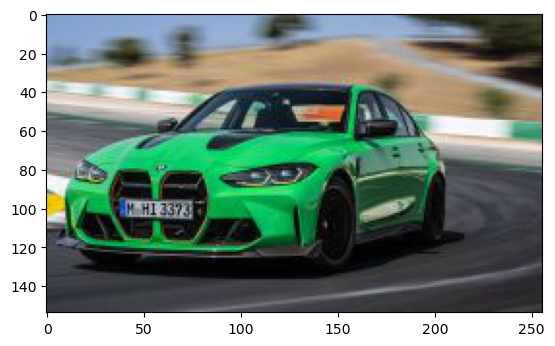

In [3]:
m3_img = cv2.imread("M3 CS.jpg", cv2.IMREAD_COLOR)
m3_img = cv2.cvtColor(m3_img, cv2.COLOR_BGR2RGB)
plt.imshow(m3_img)
plt.show()

<Figure size 10000x20000 with 0 Axes>

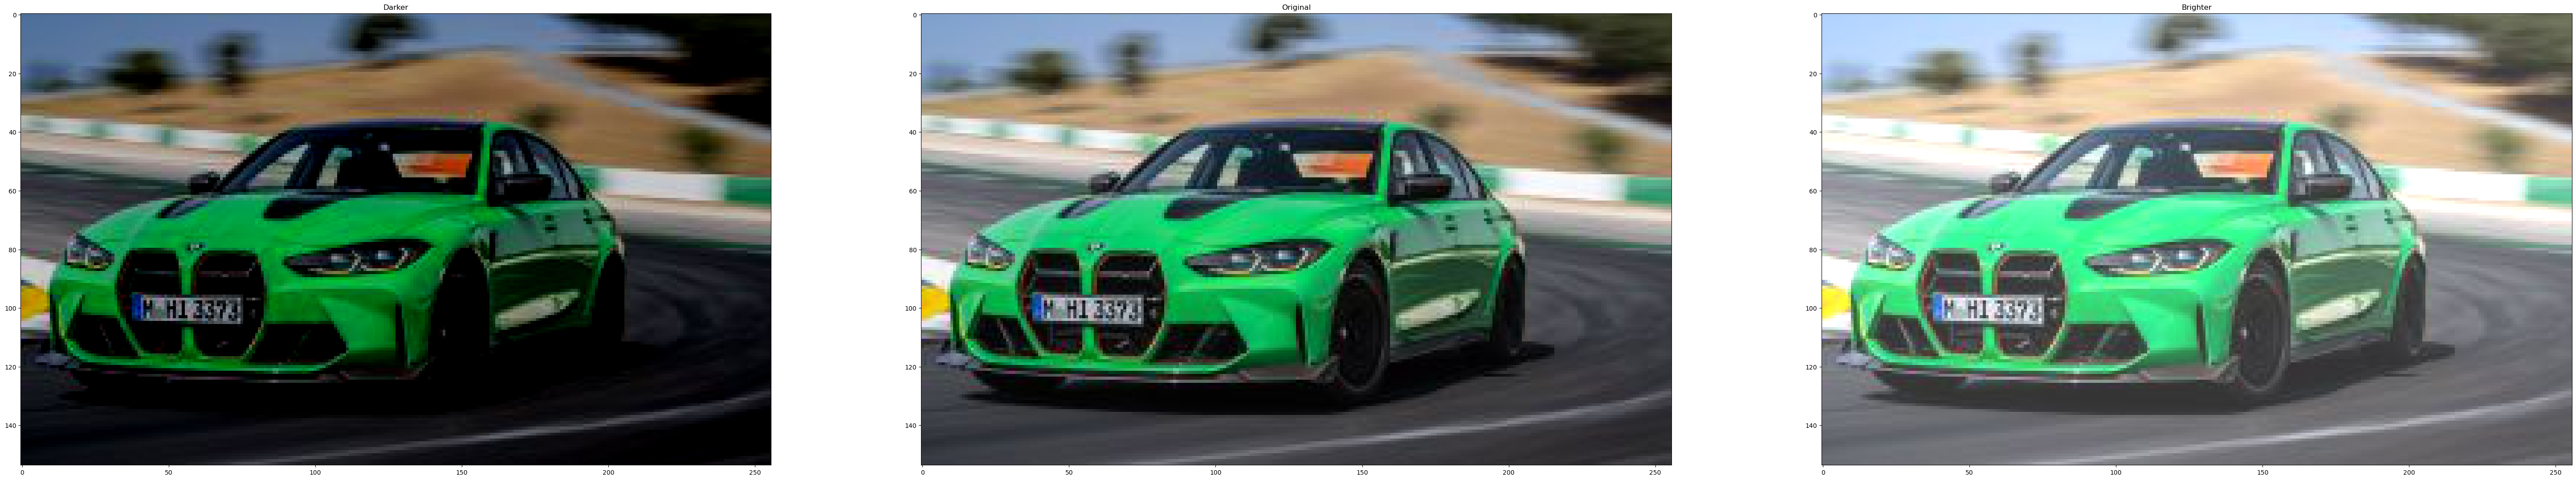

In [14]:
## (1) Making image brighter or dimmer (addition or subtraction)
matrix = np.ones(m3_img.shape, dtype = m3_img.dtype)*50

m3_img_brighter = cv2.add(m3_img, matrix)
m3_img_darker = cv2.subtract(m3_img, matrix)

plt.figure(figsize = [100, 200])
plt.subplot(141); plt.imshow(m3_img_darker); plt.title("Darker");
plt.subplot(142); plt.imshow(m3_img); plt.title("Original");
plt.subplot(143); plt.imshow(m3_img_brighter); plt.title("Brighter");
plt.show()

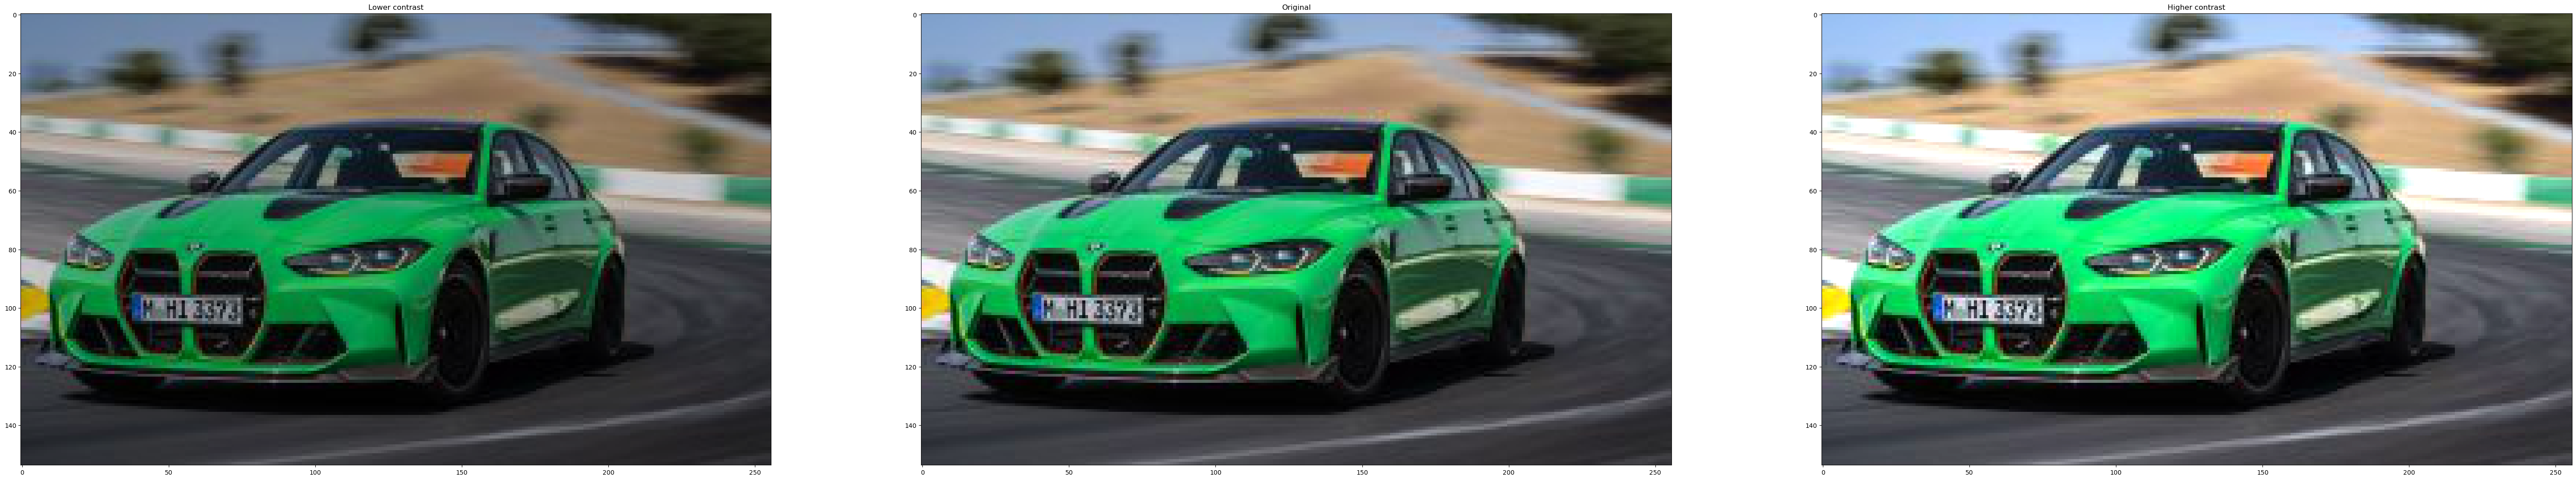

In [20]:
## (2) Increasing or decreasing contrast of image
matrix1 = np.ones(m3_img.shape)*0.8
matrix2 = np.ones(m3_img.shape)*1.2

m3_img_darker = np.uint8(cv2.multiply(np.float64(m3_img), matrix1))
m3_img_brighter = np.uint8(np.clip(cv2.multiply(np.float64(m3_img), matrix2), 0, 255))

plt.figure(figsize = [100, 200])
plt.subplot(141); plt.imshow(m3_img_darker); plt.title("Lower contrast");
plt.subplot(142); plt.imshow(m3_img); plt.title("Original");
plt.subplot(143); plt.imshow(m3_img_brighter); plt.title("Higher contrast");
plt.show()

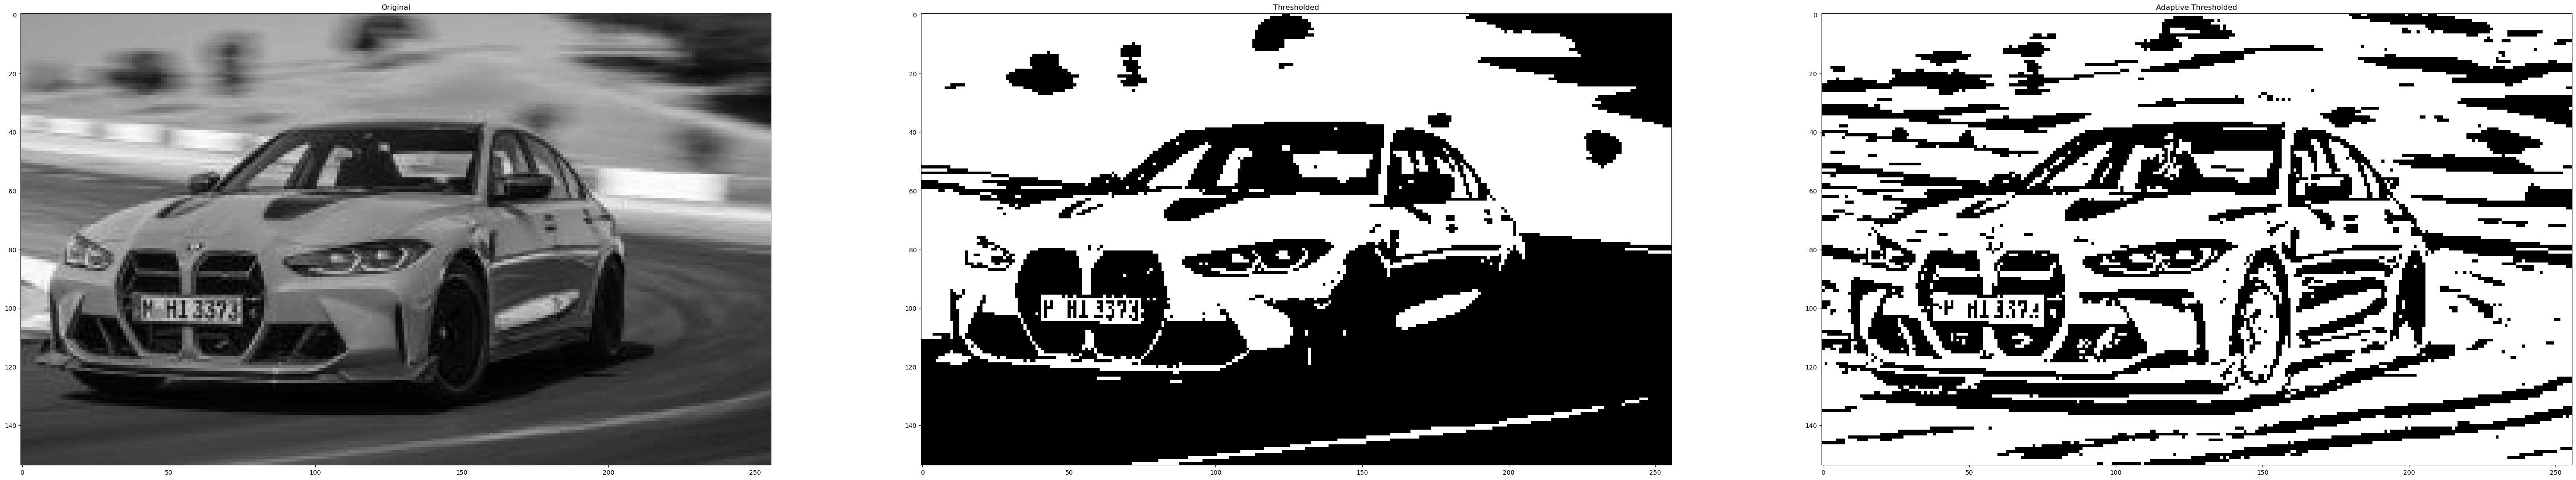

In [31]:
## (3) Image thresholding = Modifying certain portions of image while leaving other portions as it is
## Pixels below threshold become 0 (black)
## Pixels above threshold become 255 (white)

THRESH = 100
MAXVAL = 255
#retval, img_thresh = cv2.threshold(m3_img, THRESH, MAXVAL, cv2.THRESH_BINARY)

gray_img = cv2.cvtColor(m3_img, cv2.COLOR_RGB2GRAY)

# Threshold
retval, img_thresh = cv2.threshold(gray_img, THRESH, MAXVAL, cv2.THRESH_BINARY)

# Adaptive threshold
img_thresh_adp = cv2.adaptiveThreshold(gray_img, MAXVAL, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize = [100, 200])
plt.subplot(141); plt.imshow(cv2.cvtColor(m3_img, cv2.COLOR_RGB2GRAY), cmap="gray"); plt.title("Original");
plt.subplot(142); plt.imshow(img_thresh, cmap="gray"); plt.title("Thresholded");
plt.subplot(143); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Adaptive Thresholded");
plt.show()

In [ ]:
## (4) Bitwise operation: AND, OR, XOR, NOT